In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

In [5]:
# Load dataset (adjust path as needed)
data_path = "/Volumes/Eternity 1/Programacion/Semestre 8/AI/src/Puzzle 8/breast+cancer+wisconsin+original/breast-cancer-wisconsin.data.txt"
try:
    df = pd.read_csv(data_path, header=None)
    print("Data loaded successfully!")
except FileNotFoundError:
    print(f"Error: File not found at {data_path}")

# Add column names
col_names = ['Id', 'Clump_thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape', 
             'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei', 
             'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class']
df.columns = col_names

# Preview data
print("\nDataset shape:", df.shape)
df.head()

Data loaded successfully!

Dataset shape: (699, 11)


,Id,Clump_thickness,Uniformity_Cell_Size,Uniformity_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [6]:
# Drop 'Id' column
df.drop('Id', axis=1, inplace=True)

# Fix 'Bare_Nuclei' (convert to numeric, handle missing values)
df['Bare_Nuclei'] = pd.to_numeric(df['Bare_Nuclei'], errors='coerce')

# Check missing values
print("Missing values before imputation:")
print(df.isnull().sum())

# Impute missing values with median
for col in df.columns:
    df[col].fillna(df[col].median(), inplace=True)

# Verify no missing values remain
print("\nMissing values after imputation:")
print(df.isnull().sum())

Missing values before imputation:
Clump_thickness                 0
Uniformity_Cell_Size            0
Uniformity_Cell_Shape           0
Marginal_Adhesion               0
Single_Epithelial_Cell_Size     0
Bare_Nuclei                    16
Bland_Chromatin                 0
Normal_Nucleoli                 0
Mitoses                         0
Class                           0
dtype: int64

Missing values after imputation:
Clump_thickness                0
Uniformity_Cell_Size           0
Uniformity_Cell_Shape          0
Marginal_Adhesion              0
Single_Epithelial_Cell_Size    0
Bare_Nuclei                    0
Bland_Chromatin                0
Normal_Nucleoli                0
Mitoses                        0
Class                          0
dtype: int64


/var/folders/s6/39xshmvx0djb9qw_pt_ylzdc0000gn/T/ipykernel_33835/3153961055.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
/var/folders/s6/39xshmvx0djb9qw_pt_ylzdc0000gn/T/ipykernel_33835/3153961055.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alwa

Class distribution:
Class
2    0.655222
4    0.344778
Name: proportion, dtype: float64

Summary statistics:
       Clump_thickness  Uniformity_Cell_Size  Uniformity_Cell_Shape  \
count       699.000000            699.000000             699.000000   
mean          4.417740              3.134478               3.207439   
std           2.815741              3.051459               2.971913   
min           1.000000              1.000000               1.000000   
25%           2.000000              1.000000               1.000000   
50%           4.000000              1.000000               1.000000   
75%           6.000000              5.000000               5.000000   
max          10.000000             10.000000              10.000000   

       Marginal_Adhesion  Single_Epithelial_Cell_Size  Bare_Nuclei  \
count         699.000000                   699.000000   699.000000   
mean            2.806867                     3.216023     3.486409   
std             2.855379                  

<Figure size 1200x800 with 0 Axes>

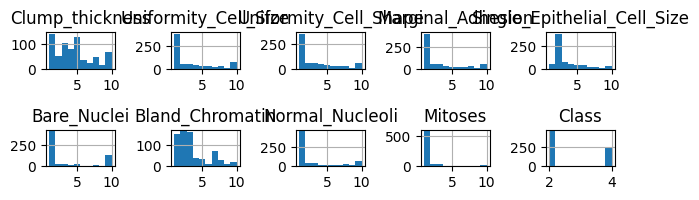

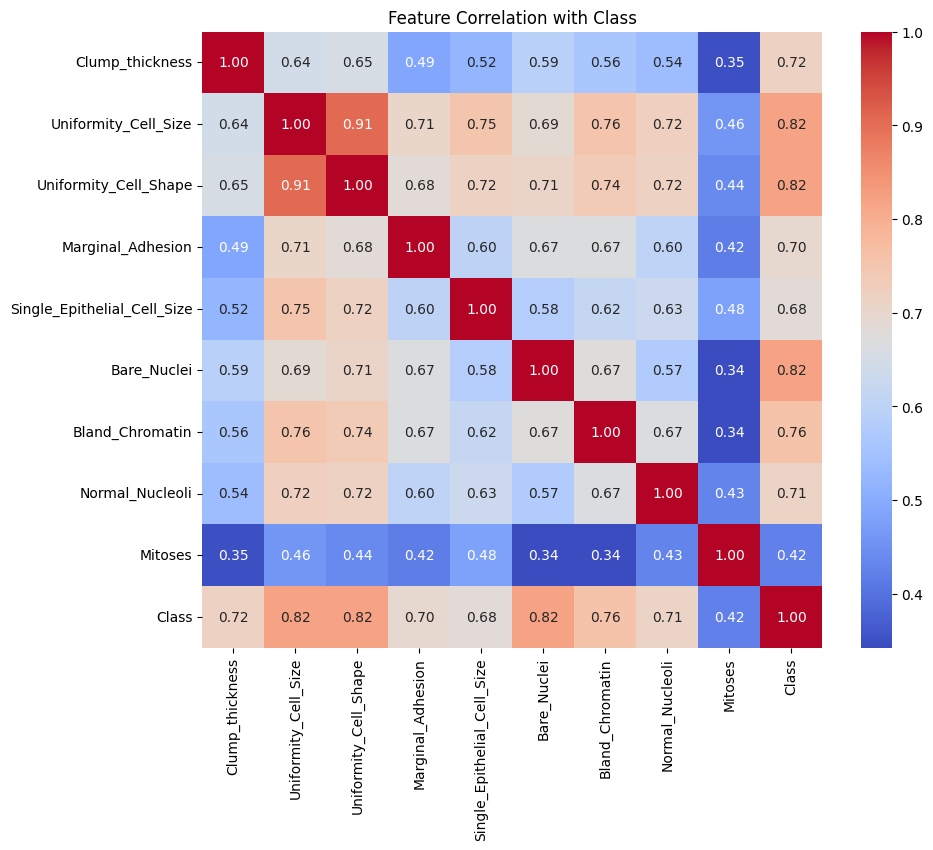

In [10]:
# Class distribution
print("Class distribution:")
print(df['Class'].value_counts(normalize=True))

# Summary statistics
print("\nSummary statistics:")
print(df.describe())

# Histograms
plt.figure(figsize=(12, 8))
df.hist(bins=10, layout=(5, 5))
plt.tight_layout()
plt.show()

# Correlation heatmap
plt.figure(figsize=(10, 8))
correlation = df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation with Class")
plt.show()

In [11]:
# Split data
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
# Train kNN (k=3)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_scaled, y_train)

# Predictions
y_pred = knn.predict(X_test_scaled)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.9714285714285714

Confusion Matrix:
[[94  1]
 [ 3 42]]

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



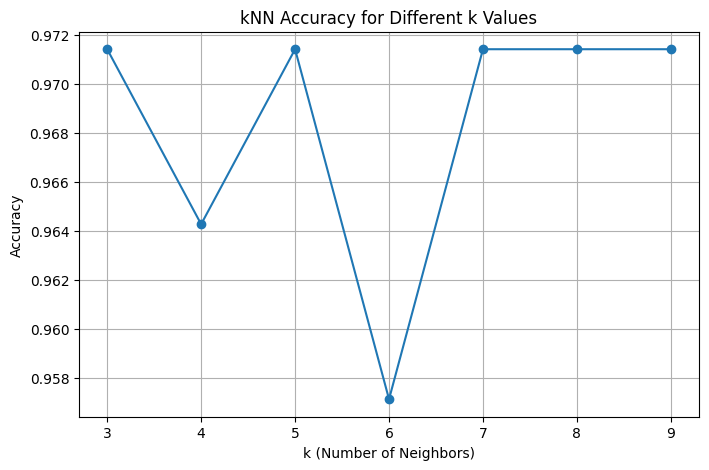

Best k: 3 (Accuracy: 0.9714)


In [13]:
# Test different k values
k_values = range(3, 10)
accuracy_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs k
plt.figure(figsize=(8, 5))
plt.plot(k_values, accuracy_scores, marker='o')
plt.xlabel('k (Number of Neighbors)')
plt.ylabel('Accuracy')
plt.title('kNN Accuracy for Different k Values')
plt.grid()
plt.show()

# Best k
best_k = k_values[np.argmax(accuracy_scores)]
print(f"Best k: {best_k} (Accuracy: {max(accuracy_scores):.4f})")

In [14]:
# Train with best k
final_knn = KNeighborsClassifier(n_neighbors=best_k)
final_knn.fit(X_train_scaled, y_train)

# Evaluate
y_pred_final = final_knn.predict(X_test_scaled)
print("\nFinal Model Performance (k={}):".format(best_k))
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_final))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_final))


Final Model Performance (k=3):
Accuracy: 0.9714285714285714

Confusion Matrix:
[[94  1]
 [ 3 42]]

Classification Report:
              precision    recall  f1-score   support

           2       0.97      0.99      0.98        95
           4       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



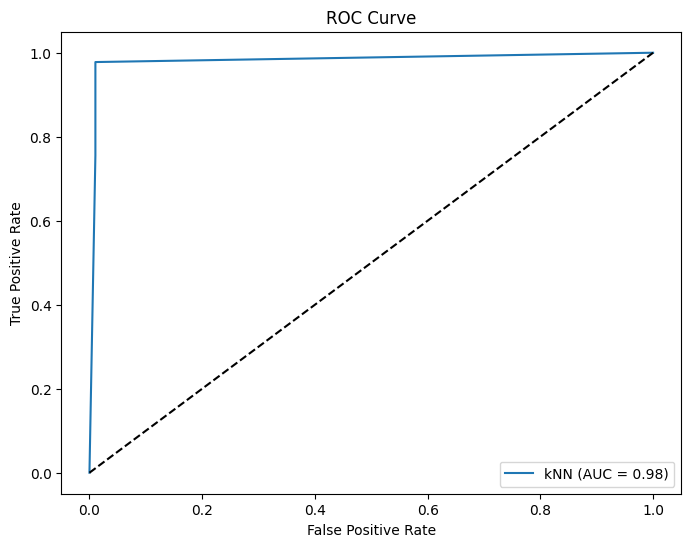

In [15]:
# Get predicted probabilities
y_pred_prob = final_knn.predict_proba(X_test_scaled)[:, 1]

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob, pos_label=4)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='kNN (AUC = {:.2f})'.format(roc_auc_score(y_test, y_pred_prob)))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [16]:
# 10-fold cross-validation
cv_scores = cross_val_score(final_knn, X_train_scaled, y_train, cv=10, scoring='accuracy')

print("Cross-Validation Scores:", cv_scores)
print("Mean CV Accuracy: {:.4f}".format(cv_scores.mean()))
print("Standard Deviation: {:.4f}".format(cv_scores.std()))

Cross-Validation Scores: [0.98214286 0.94642857 0.94642857 0.92857143 0.96428571 0.94642857
 0.94642857 0.98214286 0.94642857 0.96363636]
Mean CV Accuracy: 0.9553
Standard Deviation: 0.0164
